In [2]:
# ==========================
# Mount Google Drive
# ==========================
from google.colab import drive
import os

drive.mount('/content/drive')

# ==========================
# Set Base Path
# ==========================
base_path = "/content/drive/MyDrive/Healthcare_EDA_Projects"

# Project name
project_name = "Netflix_EDA"

# Full path for this project
project_path = os.path.join(base_path, project_name)

# Folder paths
raw_path = os.path.join(project_path, "data", "raw")
processed_path = os.path.join(project_path, "data", "processed")
notebooks_path = os.path.join(project_path, "notebooks")
reports_path = os.path.join(project_path, "reports")
figures_path = os.path.join(reports_path, "figures")

# ==========================
# Create Folders
# ==========================
folders = [raw_path, processed_path, notebooks_path, reports_path, figures_path]
for folder in folders:
    os.makedirs(folder, exist_ok=True)

# ==========================
# Create Empty Files
# ==========================
files = [
    os.path.join(reports_path, "README.md"),
    os.path.join(project_path, "requirements.txt"),
    os.path.join(project_path, "LICENSE"),
    os.path.join(project_path, ".gitignore"),
    os.path.join(project_path, "README.md")
]
for file in files:
    open(file, 'a').close()

print(f"✅ Project structure created at: {project_path}")


Mounted at /content/drive
✅ Project structure created at: /content/drive/MyDrive/Healthcare_EDA_Projects/Netflix_EDA


In [3]:
# =======================================
# 📌 Project: Netflix and IMDb Shows EDA
# =======================================

In [4]:
# ========================
# Setup & Imports
# ========================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Set visual style
sns.set(style="whitegrid")

In [5]:
# ========================
# Load Dataset
# ========================
# Upload manually
from google.colab import files
uploaded = files.upload()  # Upload netflix_titles.csv here

# Save raw data
df_raw = pd.read_csv("netflix_titles.csv")
df_raw.to_csv(os.path.join(raw_path, "netflix_titles.csv"), index=False)  # Save to Drive

print("\n--- First 5 rows ---\n")
print(df_raw.head())

Saving netflix_titles.csv to netflix_titles.csv

--- First 5 rows ---

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R    

In [6]:
# ========================
# Basic Info & Summary
# ========================
print("\n--- Dataset Info ---\n")
df_raw.info()
print("\n--- Summary Stats ---\n")
print(df_raw.describe())


--- Dataset Info ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB

--- Summary Stats ---

       release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000


In [7]:
netflix_shows=df_raw[df_raw['type']=='TV Show']

In [9]:
netflix_movies=df_raw[df_raw['type']=='Movie']

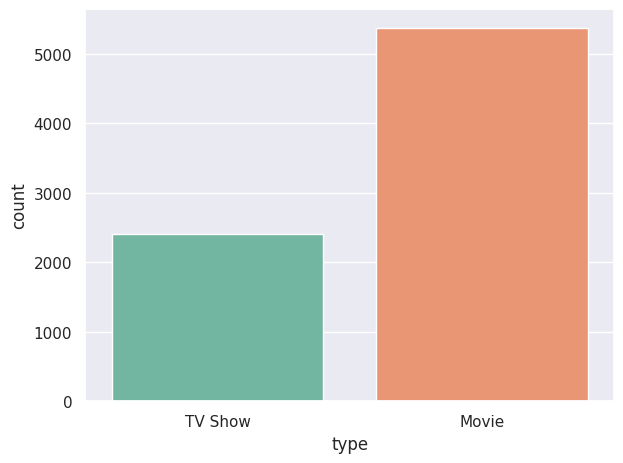

In [11]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=df_raw, palette="Set2")
plt.savefig(os.path.join(figures_path, "Count of Shows and Movies.png"))
plt.tight_layout()
plt.show()
plt.close()

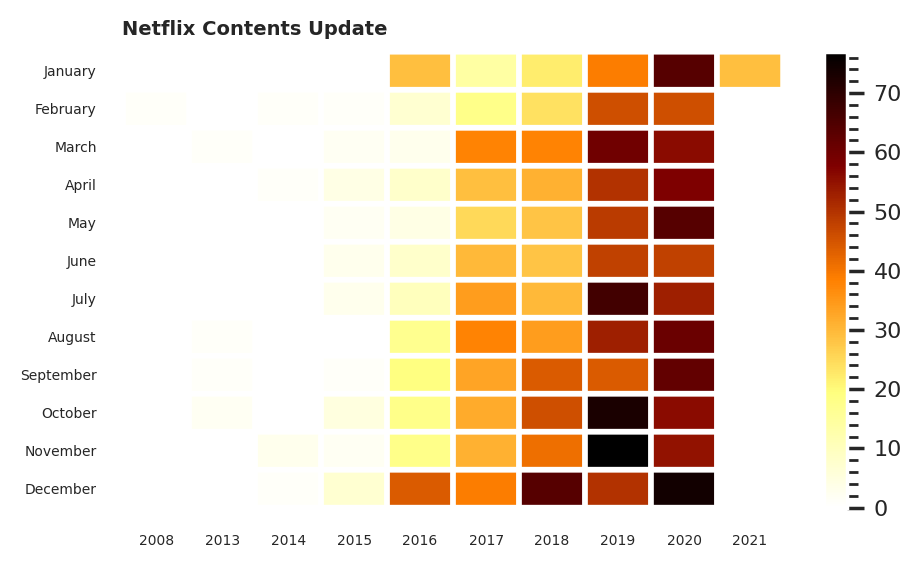

In [17]:
#If a producer wants to release some content, which month must he do so?( Month when least amount of content is added)

netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(5, 3), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=5, fontfamily='sans-serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=5, fontfamily='sans-serif')

plt.title('Netflix Contents Update', fontsize=7, fontfamily='sans-serif', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.savefig(os.path.join(figures_path, "Netflix Contents Update.png"))
plt.tight_layout()
plt.show()
plt.close()

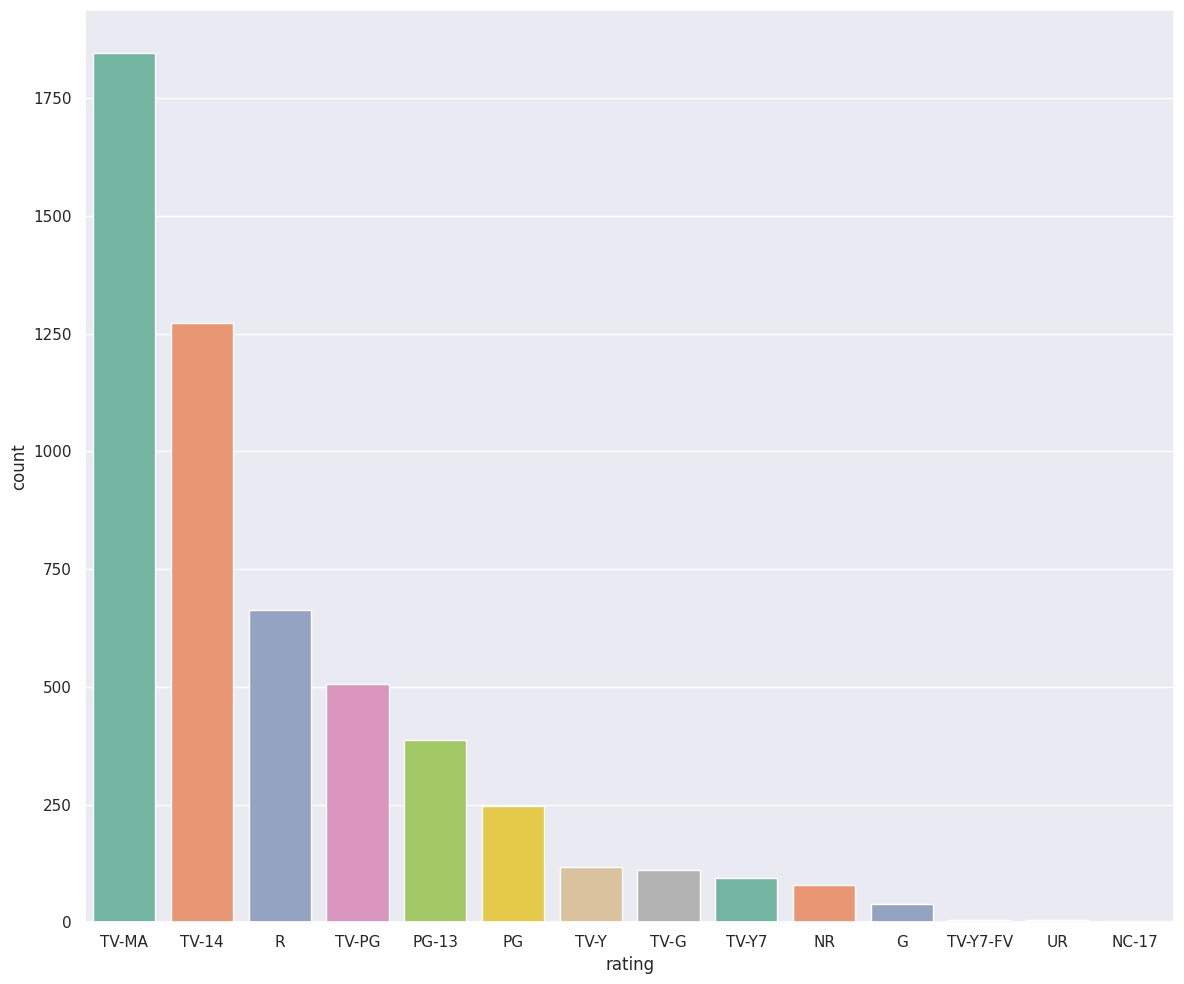

In [23]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])
plt.savefig(os.path.join(figures_path, "Ratings.png"))
plt.tight_layout()
plt.show()
plt.close()

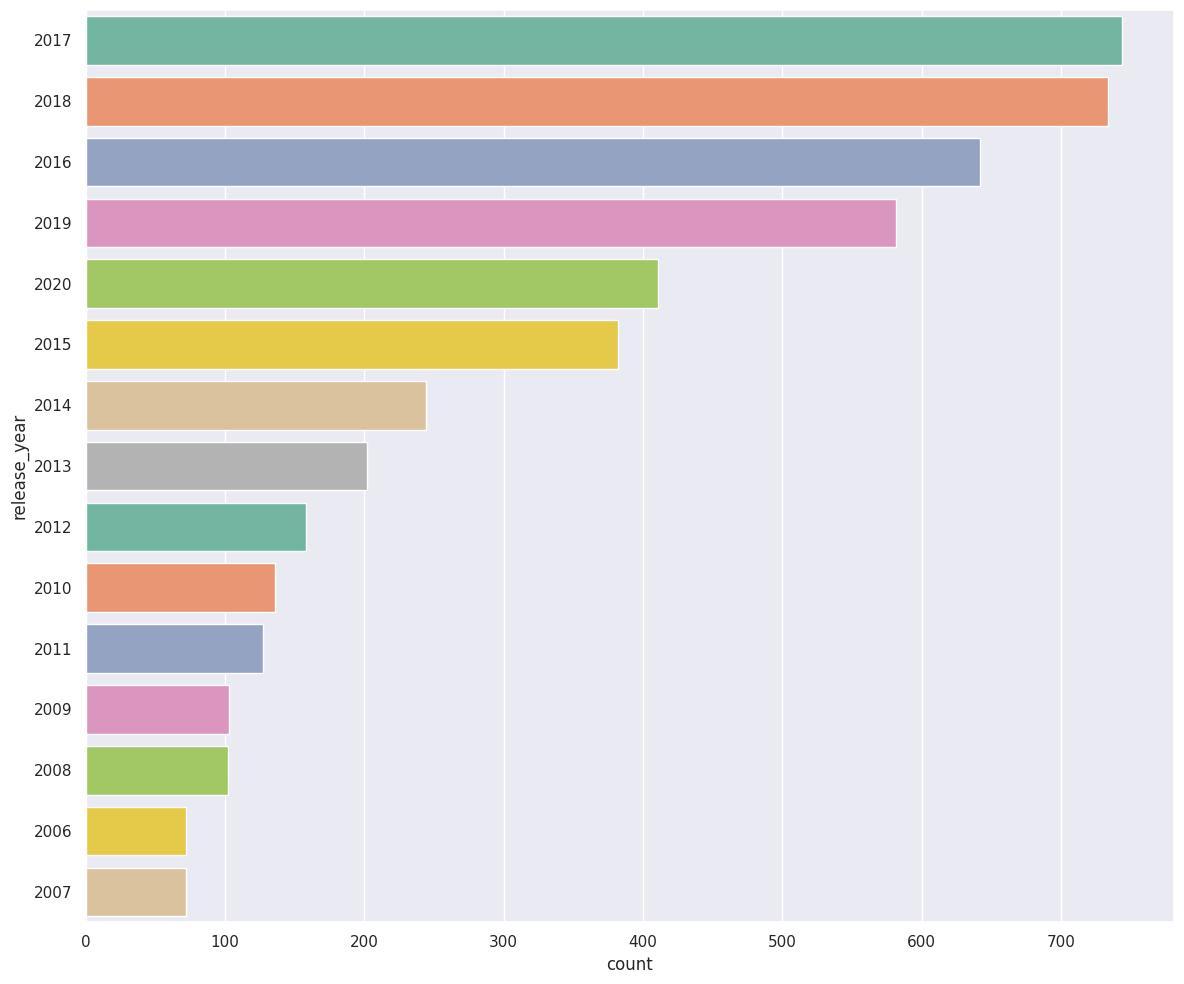

In [24]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set2", order=netflix_movies['release_year'].value_counts().index[0:15])
plt.savefig(os.path.join(figures_path, "Release_Year.png"))
plt.tight_layout()
plt.show()
plt.close()

In [25]:
countries={}
netflix_movies['country']=netflix_movies['country'].fillna('Unknown')
cou=list(netflix_movies['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1

In [26]:
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no

countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

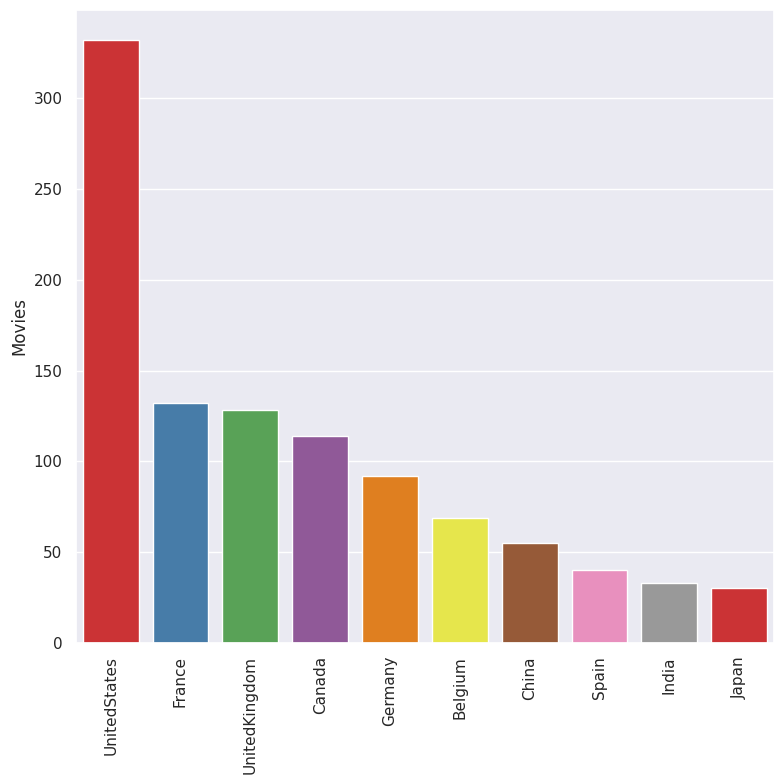

In [30]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10], palette="Set1")
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 90)
plt.ylabel('Movies')
plt.savefig(os.path.join(figures_path, "Countries.png"))
plt.tight_layout()
plt.show()
plt.close()

In [31]:
netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)
netflix_movies['duration']

,duration
1,93
2,78
3,80
4,123
6,95
...,...
7781,88
7782,99
7783,111
7784,44


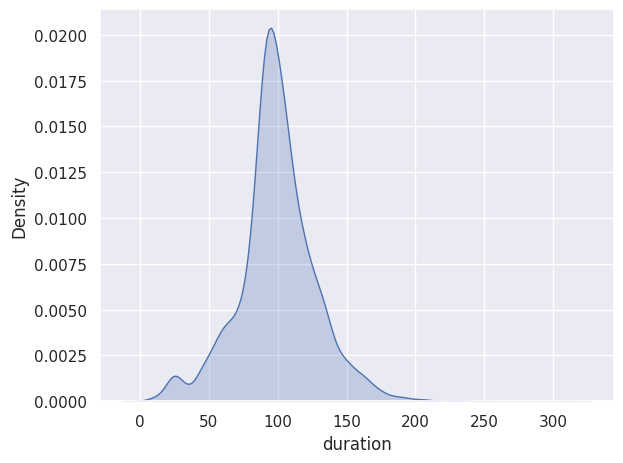

In [32]:
sns.set(style="darkgrid")
sns.kdeplot(data=netflix_movies['duration'], shade=True)
plt.savefig(os.path.join(figures_path, "Movie_duration.png"))
plt.tight_layout()
plt.show()
plt.close()

In [33]:
from collections import Counter

genres=list(netflix_movies['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

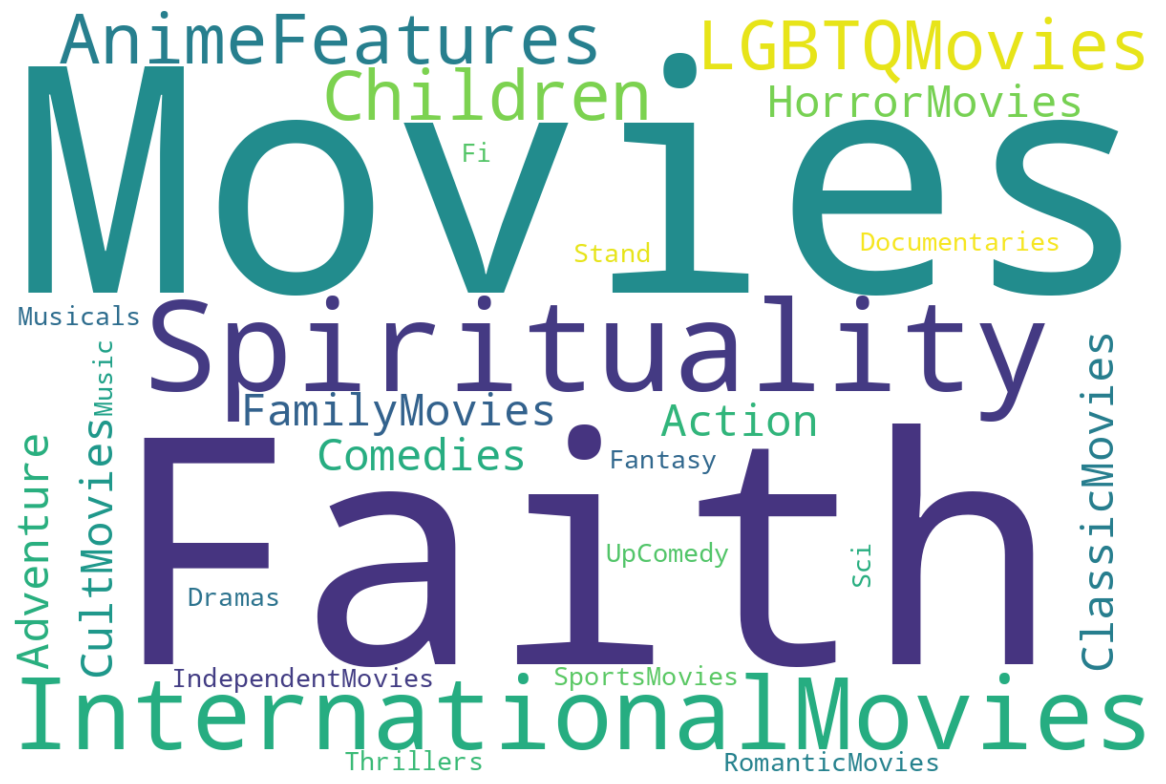

In [40]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

text = " ".join(list(set(gen)))

wordcloud = WordCloud(
    width=1200,
    height=800,
    background_color="white",
    max_words=1000,
    stopwords=STOPWORDS,
    colormap='viridis'
).generate(text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig(os.path.join(figures_path, "Movie_Worldcloud.png"))
plt.tight_layout()
plt.show()
plt.close()

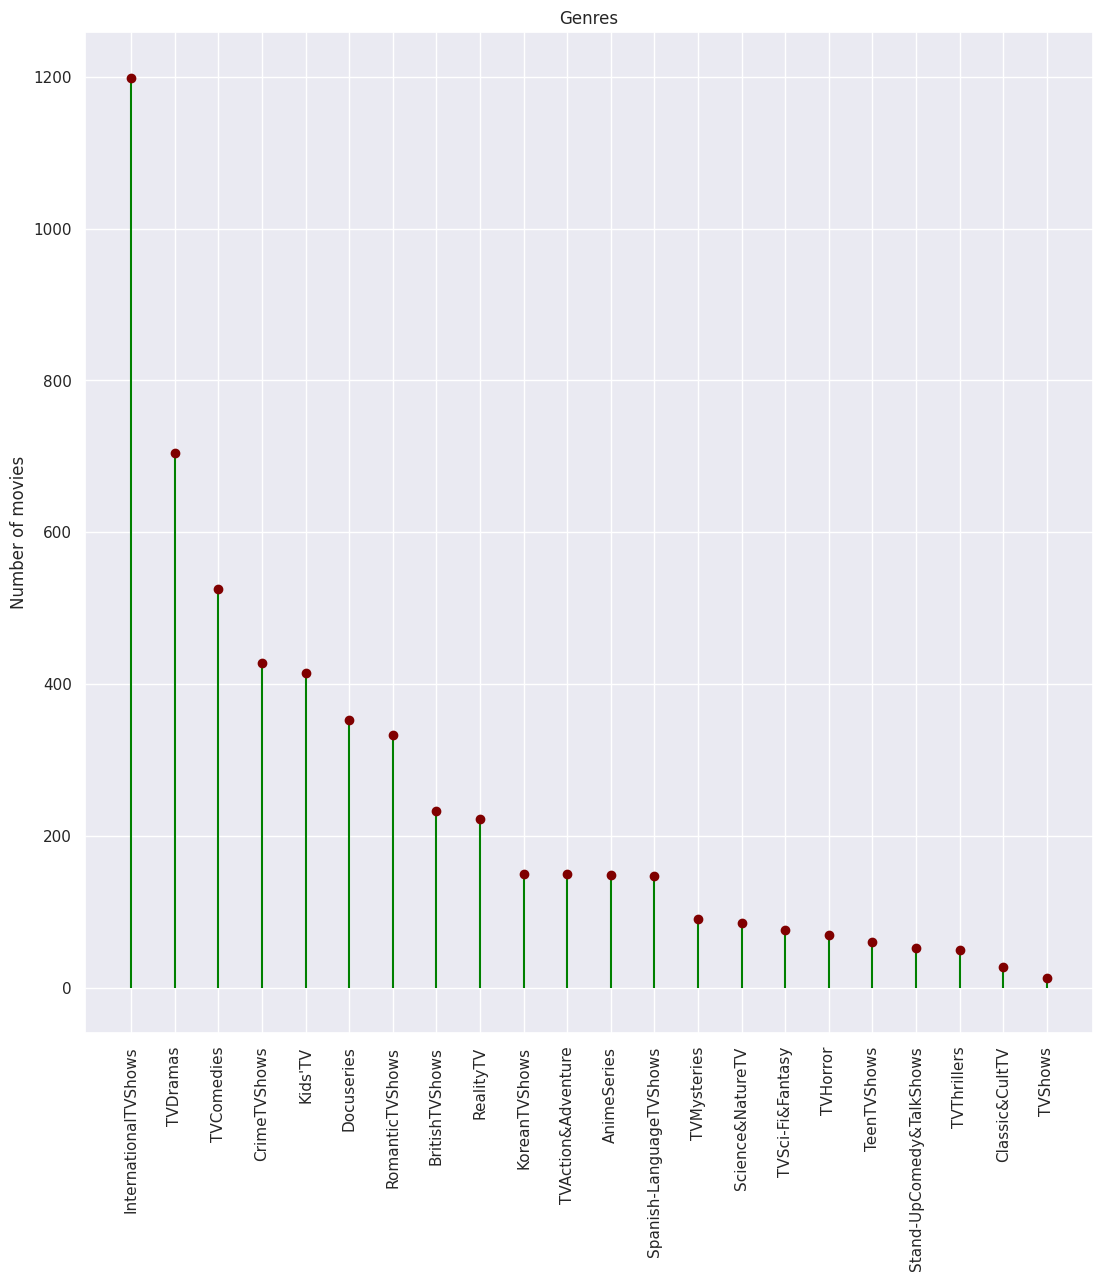

<Figure size 1000x1000 with 0 Axes>

In [58]:
g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}


fig, ax = plt.subplots()

fig = plt.figure(figsize = (10, 10))
x=list(g.keys())
y=list(g.values())
ax.vlines(x, ymin=0, ymax=y, color='green')
ax.plot(x,y, "o", color='maroon')
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Number of movies")
# set a title
ax.set_title("Genres");
plt.savefig(os.path.join(figures_path, "Movie_Genre_counts.png"))
plt.tight_layout()
plt.show()
plt.close()

In [43]:
countries1={}
netflix_shows['country']=netflix_shows['country'].fillna('Unknown')
cou1=list(netflix_shows['country'])
for i in cou1:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries1.keys()):
            countries1[i]+=1
        else:
            countries1[i[0]]=1
    else:
        for j in i:
            if j in list(countries1.keys()):
                countries1[j]+=1
            else:
                countries1[j]=1

In [44]:
countries_fin1={}
for country,no in countries1.items():
    country=country.replace(' ','')
    if country in list(countries_fin1.keys()):
        countries_fin1[country]+=no
    else:
        countries_fin1[country]=no

countries_fin1={k: v for k, v in sorted(countries_fin1.items(), key=lambda item: item[1], reverse= True)}

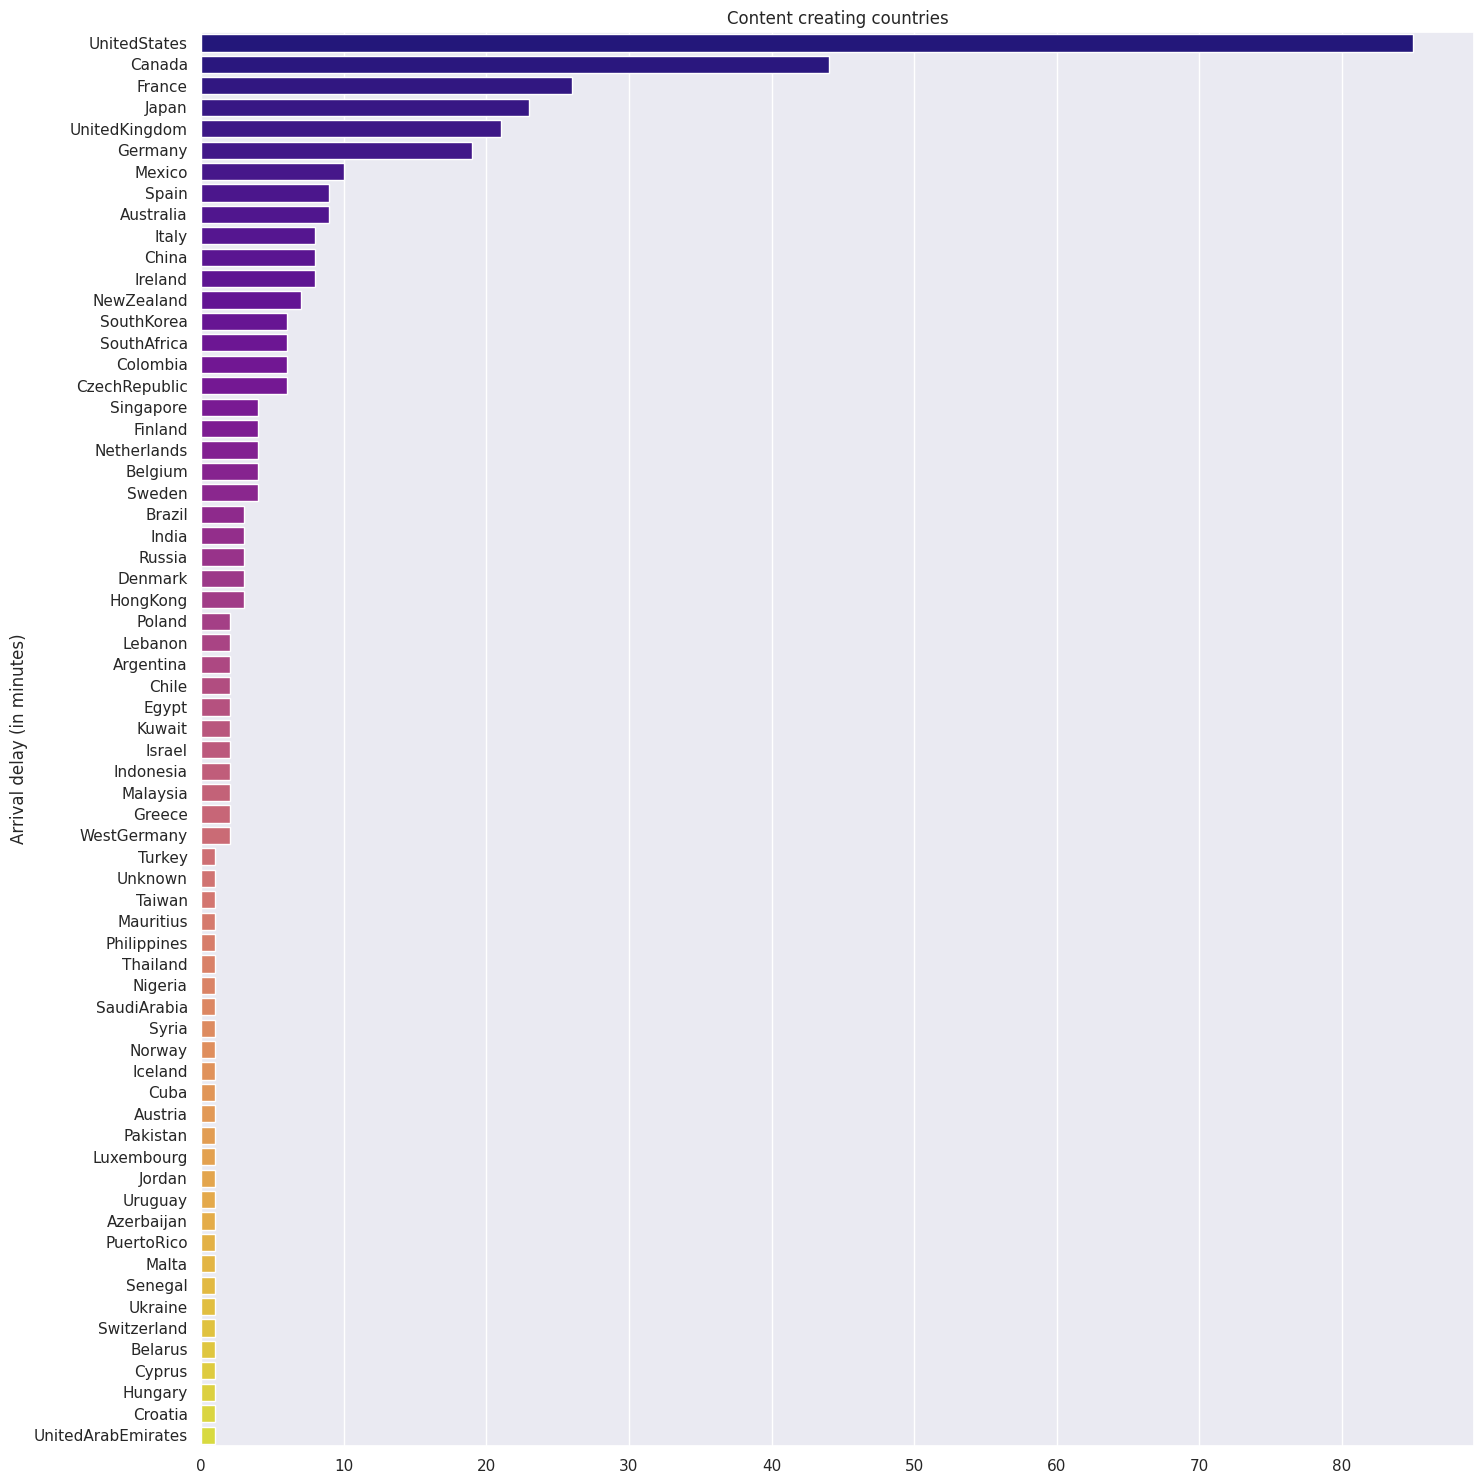

In [50]:
plt.figure(figsize=(15,15))
plt.title("Content creating countries")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(y=list(countries_fin1.keys()), x=list(countries_fin1.values()), palette= 'plasma')
plt.ylabel("Arrival delay (in minutes)")
plt.savefig(os.path.join(figures_path, "Content creating countries.png"))
plt.tight_layout()
plt.show()
plt.close()

In [51]:
features=['title','duration']
durations= netflix_shows[features]

durations['no_of_seasons']=durations['duration'].str.replace(' Season','')

#durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')

In [52]:
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

In [53]:
t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)

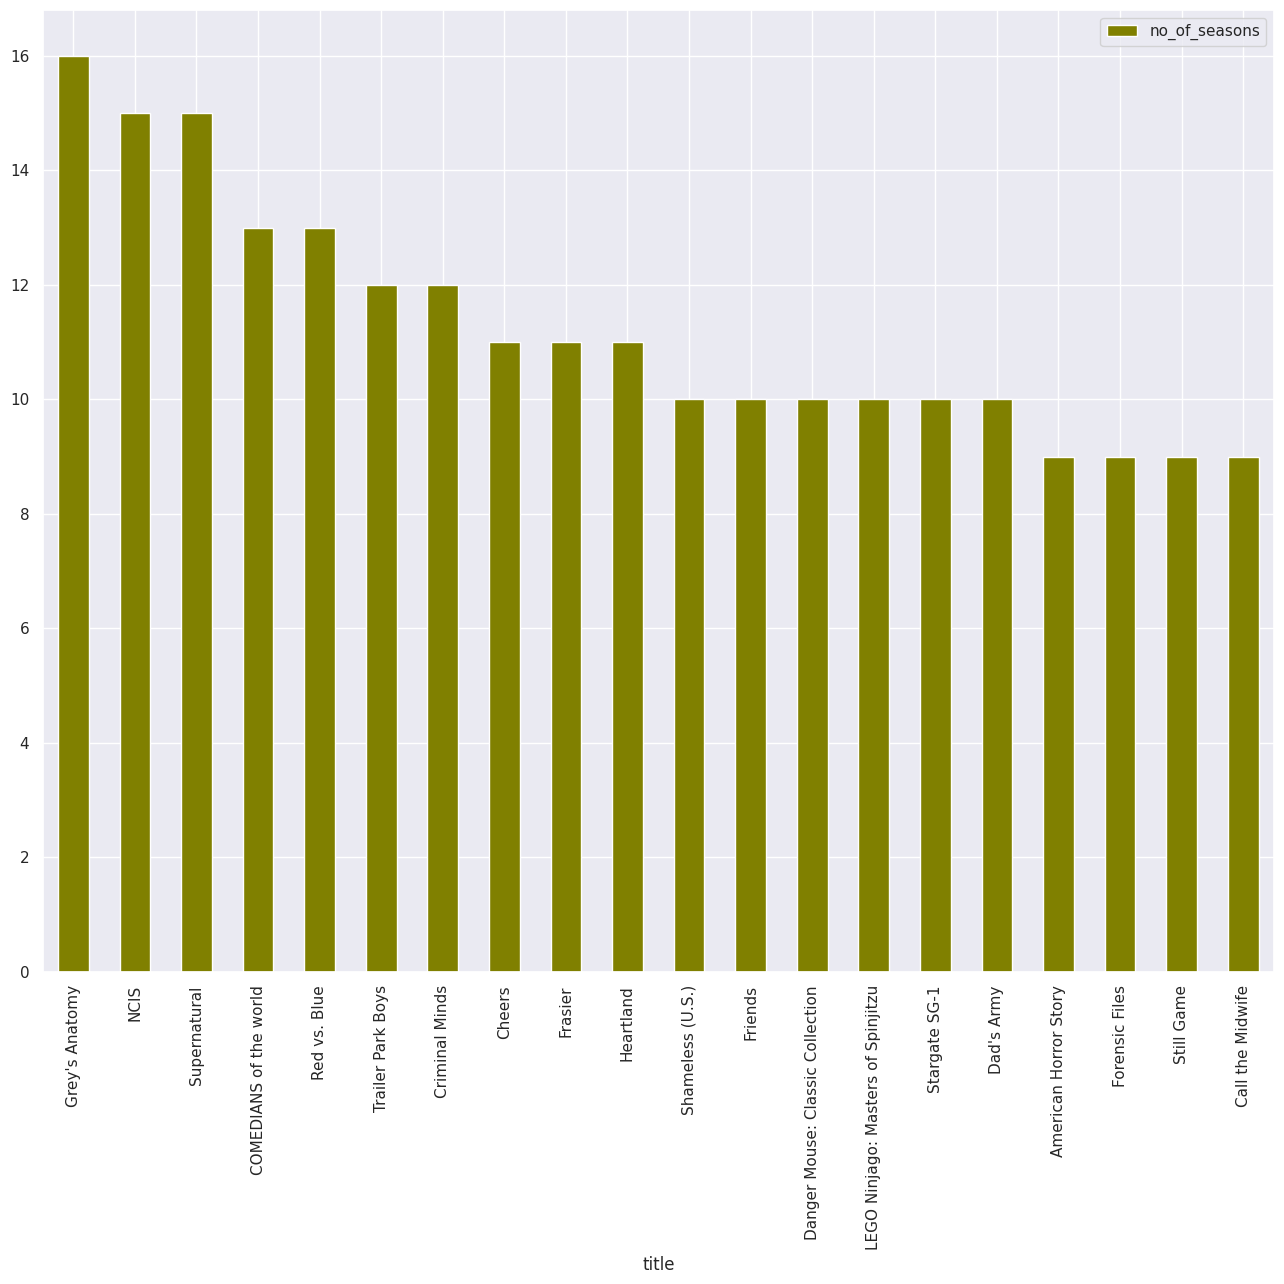

In [55]:
top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='olive')
plt.savefig(os.path.join(figures_path, "Content creating countries.png"))
plt.tight_layout()
plt.show()
plt.close()

In [56]:
genres=list(netflix_shows['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

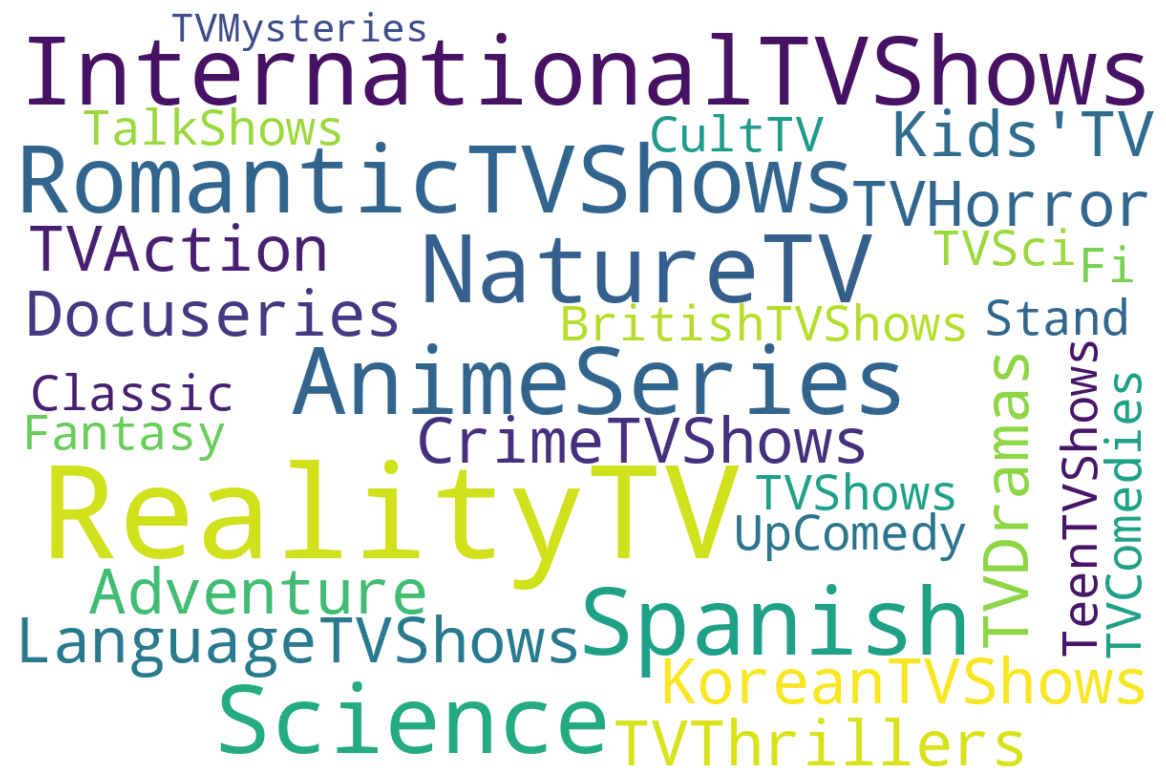

In [57]:
text = " ".join(list(set(gen)))

wordcloud = WordCloud(
    width=1200,
    height=800,
    background_color="white",
    max_words=1000,
    stopwords=STOPWORDS,
    colormap='viridis'
).generate(text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig(os.path.join(figures_path, "TV-Shows_Worldcloud.png"))
plt.tight_layout()
plt.show()
plt.close()